In [15]:
import os
name = "deeplabv3plus_mobilenet_multi_combined_80k"
work_dir = './work_dirs/' + name

checkpoint_file = os.path.join(work_dir, "latest.pth")
classes = ("Background", "Meat", "Nuts/seeds", "Eggs", "Beans/lentils/peas", "Fruit", "Grain", "Vegetables", "Dairy", "Sauce/Spread", "Soup/Drink")
palette = [[0,0,0], [234, 73, 97], [191, 122, 57], [255, 255, 0], 
           [255, 0, 204], [120, 79, 255], [211, 255, 117], [61, 252, 48], [255, 255, 255],[107, 7, 0], [97, 80, 5], [250, 87, 236]][0:len(classes)]

In [16]:
import time
import matplotlib
import matplotlib.pylab as plt
import numpy as np
plt.rcParams["axes.grid"] = False

import mmcv
from mmcv.runner import load_checkpoint
import mmcv.visualization.image as mmcv_image
# fix for colab

def imshow(img, win_name='', wait_time=0): plt.figure(
    figsize=(50, 50)); plt.imshow(img)


mmcv_image.imshow = imshow
from mmseg.models import build_segmentor
from mmseg.apis import inference_segmentor, init_segmentor



config_fname = "./work_dirs/" + name+"/"+name +".py"
# build the model from a config file and a checkpoint file
model = init_segmentor(config_fname, checkpoint_file)
model.CLASSES = classes


load checkpoint from local path: ./work_dirs/deeplabv3plus_mobilenet_multi_combined_80k/latest.pth


In [19]:
from PIL import Image
import copy
def show_result_pyplot(model,
                       img,
                       result,
                       palette=None,
                       fig_size=(15, 10),
                       opacity=0.5,
                       title='',
                       block=True,
                       show_legend=False):
    """Visualize the segmentation results on the image.

    Args:
        model (nn.Module): The loaded segmentor.
        img (str or np.ndarray): Image filename or loaded image.
        result (list): The segmentation result.
        palette (list[list[int]]] | None): The palette of segmentation
            map. If None is given, random palette will be generated.
            Default: None
        fig_size (tuple): Figure size of the pyplot figure.
        opacity(float): Opacity of painted segmentation map.
            Default 0.5.
            Must be in (0, 1] range.
        title (str): The title of pyplot figure.
            Default is ''.
        block (bool): Whether to block the pyplot figure.
            Default is True.
    """
    if hasattr(model, 'module'):
        model = model.module
    original = Image.open(img).convert('RGB')
    result_map = np.array(result, dtype=np.uint8)
    h = result_map.shape[-1]
    w = result_map.shape[-2]
    result_map = result_map.repeat(4).reshape(w,h,4)
    result_map_ids = np.unique(result_map)
    print(result_map_ids)
    for i in result_map_ids:
        color = copy.deepcopy(palette[int(i)])
        if(i == 0):
            color.append(0)
        else:
            color.append(255*opacity)
        result_map = np.where(result_map == [i,i,i,i], color, result_map)
    result_map = result_map/255

    plt.figure(figsize=fig_size)
    plt.axis("off")
    plt.imshow(original)
    plt.imshow(result_map)
    plt.tight_layout()
    plt.show(block=block)

[0 1 7]


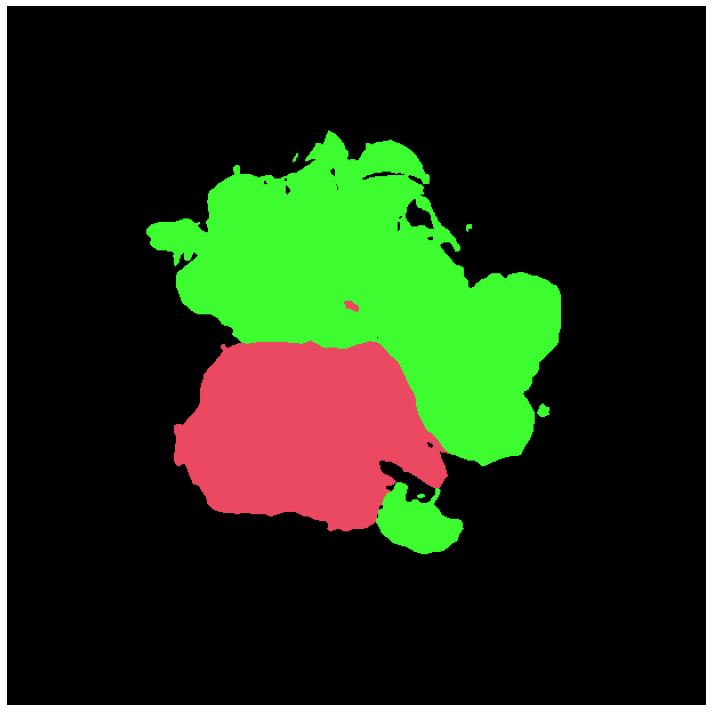

In [21]:
# test a single image and show the results
img = 'anotherplate.jpg'   #you can change this to any image you want!

result, _ = inference_segmentor(model, img)
show_result_pyplot(model, img, result, palette, opacity=.5, show_legend=True)